### Import Statements

In [1]:
from matplotlib import image
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import decomposition

### Reading Files

In [2]:
os.listdir()

['VeryMildDemented',
 'preliminary_analysis.ipynb',
 'ModerateDemented',
 'MildDemented',
 '.ipynb_checkpoints',
 'NonDemented']

In [3]:
path = os.getcwd() + "/"
verymild = os.listdir()[0]
moderate = os.listdir()[2]
mild = os.listdir()[3]
nondemented = os.listdir()[-1]

verymildfiles = os.listdir(path + verymild + "/")
moderatefiles = os.listdir(path + moderate + "/")
mildfiles = os.listdir(path + mild + "/")
nondementedfiles = os.listdir(path + nondemented + "/")

verymild_images = [image.imread(path + verymild + "/" + file) for file in verymildfiles]
moderate_images = [image.imread(path + moderate + "/" + file) for file in moderatefiles]
mild_images = [image.imread(path + mild + "/" + file) for file in mildfiles]
nondemented_images = [image.imread(path + nondemented + "/" + file) for file in nondementedfiles]

### Visualizing Image Scans

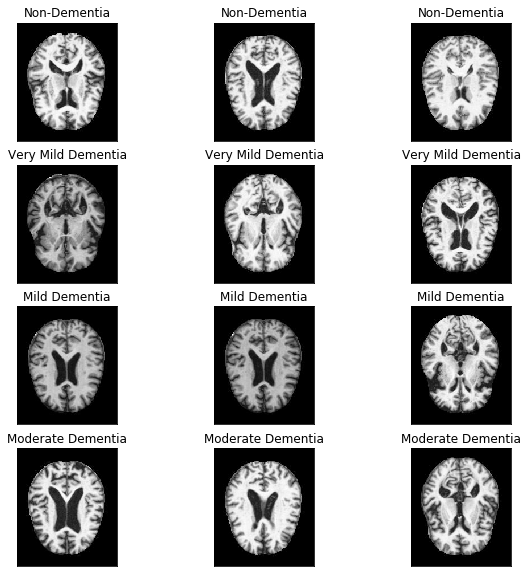

In [4]:
scans = [nondemented_images, verymild_images, mild_images, moderate_images]
scan_labels = ['Non-Dementia', 'Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

fig, ax = plt.subplots(4, 3, figsize=(10,10))
for i in range(4):
    for j in range(3):
        ax[i, j].imshow(scans[i][j], cmap='Greys_r')
        ax[i, j].set_title(scan_labels[i])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

#### NOTE: Brain images are varied... kind of hard to tell at the moment oof BIG OOF

### Analysis

In [5]:
dementia_images = verymild_images + moderate_images + mild_images

In [6]:
print(len(dementia_images))
print(len(nondemented_images))

2561
2560


\# Individuals who have dementia (agg. verymild, moderate, mild) = \#Individuals who don't have dementia

### Train/Dev Split

In [7]:
dementia_labels = np.array([1] * len(dementia_images))
nondementia_labels = np.array([0] * len(nondemented_images))

X = np.array(dementia_images + nondemented_images)
Y = np.array(list(dementia_labels) + list(nondementia_labels))

In [8]:
shuffle = np.random.permutation(len(X))

In [13]:
X, Y = X[shuffle], Y[shuffle]

X_train = np.array([list(i.flatten()) for i in X[:3584]])
Y_train = Y[:3584]

X_dev = np.array([list(i.flatten()) for i in X[3584:]])
Y_dev = Y[3584:]

In [ ]:
# Bernoulli Naive Bayes
alpha = [0.001, 0.01, 0.1, 1, 5, 10]

for a in alpha:
    bnb = BernoulliNB(alpha = a)
    bnb.fit(X_train, Y_train)
    y_pred_bnb = bnb.predict(X_dev)
    bnb_accuracy = accuracy_score(Y_dev, y_pred_bnb)
    print(f'Alpha: {a} \n Accuracy: {bnb_accuracy}')

In [ ]:
# Bernoulli Naive Bayes with binarized data 
for a in alpha:
    bnb2 = BernoulliNB(alpha=a, binarize=0.5)
    bnb2.fit(X_train, Y_train)
    y_pred_bnb2 = bnb2.predict(X_dev)
    bnb2_accuracy = accuracy_score(Y_dev, y_pred_bnb2)
    print(f'Alpha: {a} \n Accuracy: {bnb2_accuracy}') # huh same results

In [12]:
# Multinomail Naive Bayes
for a in alpha:
    mnb = MultinomialNB(alpha=a)
    mnb.fit(X_train, Y_train)
    y_pred_mnb = mnb.predict(X_dev)
    mnb_accuracy = accuracy_score(Y_dev, y_pred_mnb)
    print(f'Alpha: {a} \n Accuracy: {mnb_accuracy}') # this makes sense that it scores better than bnb because we didn't binarize our data in bnb

Alpha: 0.001 
 Accuracy: 0.6350032530904359
Alpha: 0.01 
 Accuracy: 0.6350032530904359
Alpha: 0.1 
 Accuracy: 0.6350032530904359
Alpha: 1 
 Accuracy: 0.6350032530904359
Alpha: 5 
 Accuracy: 0.6350032530904359
Alpha: 10 
 Accuracy: 0.6350032530904359


In [13]:
# KNN
neighbors = [1,3,5,10,20]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    y_pred_knn = knn.predict(X_dev)
    knn_accuracy = accuracy_score(Y_dev, y_pred_knn)
    print(f'N: {n} \n Accuracy: {knn_accuracy}') # does this make sense?

N: 1 
 Accuracy: 0.9986987638256344
N: 3 
 Accuracy: 0.9895901106050748
N: 5 
 Accuracy: 0.9726740403383214
N: 10 
 Accuracy: 0.8867924528301887
N: 20 
 Accuracy: 0.7957059206245933


In [14]:
# SVC
C = [0.01,0.1,1,5,10]
for c in C:
    svc = SVC(C=c)
    svc.fit(X_train, Y_train)
    y_pred_svc = svc.predict(X_dev)
    svc_accuracy = accuracy_score(Y_dev, y_pred_svc)
    print(f'C: {c} \n Accuracy: {svc_accuracy}')

/Users/julielai/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C: 0.01 
 Accuracy: 0.4749512036434613


/Users/julielai/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C: 0.1 
 Accuracy: 0.4749512036434613


/Users/julielai/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C: 1 
 Accuracy: 0.4749512036434613


/Users/julielai/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C: 5 
 Accuracy: 0.4749512036434613


/Users/julielai/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C: 10 
 Accuracy: 0.4749512036434613


### trying tensorflow

In [16]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

    100% |████████████████████████████████| 165.1MB 202kB/s ta 0:00:011   52% |████████████████▊               | 86.1MB 3.1MB/s eta 0:00:26    53% |█████████████████▏              | 88.7MB 6.2MB/s eta 0:00:13    56% |██████████████████              | 92.7MB 1.8MB/s eta 0:00:40    61% |███████████████████▊            | 101.9MB 2.9MB/s eta 0:00:22    76% |████████████████████████▌       | 126.6MB 7.5MB/s eta 0:00:06    78% |█████████████████████████       | 128.8MB 6.8MB/s eta 0:00:06    79% |█████████████████████████▎      | 130.5MB 2.8MB/s eta 0:00:13    93% |█████████████████████████████▉  | 153.8MB 6.2MB/s eta 0:00:02
    100% |████████████████████████████████| 71kB 6.0MB/s ta 0:00:011
    100% |████████████████████████████████| 133kB 3.8MB/s ta 0:00:011
    100% |████████████████████████████████| 6.8MB 3.8MB/s ta 0:00:011
    100% |████████████████████████████████| 460kB 7.0MB/s ta 0:00:011
    100% |████████████████████████████████| 51kB 10.9MB/s ta 0:00:01
    100% |██████████████

    100% |████████████████████████████████| 81kB 10.6MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 8.0MB/s ta 0:00:01
  Stored in directory: /Users/julielai/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0


### load and create datasets

In [17]:
batch_size = 32
img_height = 180
img_width = 180

In [18]:
path

'/Users/julielai/Documents/MIDS/MIDS_W207/w207finalproject/w207finalproject/Alzheimer_s Dataset/train/'

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 5121 files belonging to 5 classes.
Using 4097 files for training.


In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5121 files belonging to 5 classes.
Using 1024 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names) #idk if the ipynb checkpoints does anything

['.ipynb_checkpoints', 'MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


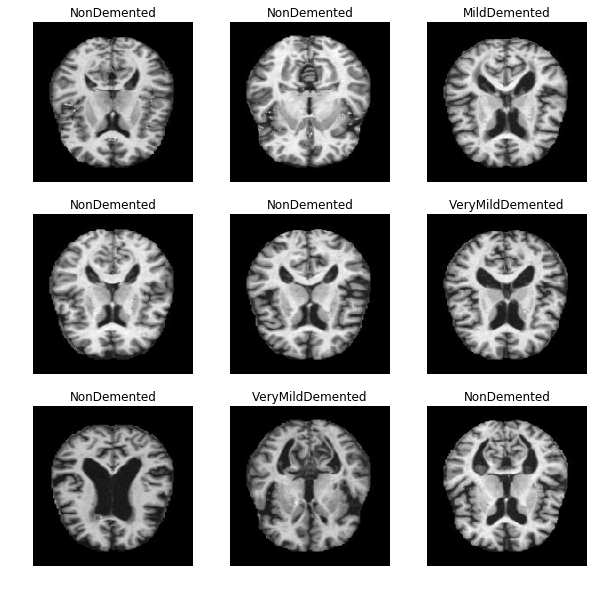

In [23]:
# plotting first 9 images of training dataset

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### configure dataset for performance
Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Dataset.prefetch() overlaps data preprocessing and model execution while training.



In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### standardize dataset

In [27]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9868531


### create the model

In [30]:
from tensorflow.keras.models import Sequential


num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### compile the model

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### train the model

In [34]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
129/129 [==============================] - 81s 625ms/step - loss: 1.0106 - accuracy: 0.5160 - val_loss: 0.8829 - val_accuracy: 0.6152
Epoch 2/10
129/129 [==============================] - 68s 524ms/step - loss: 0.8181 - accuracy: 0.6317 - val_loss: 0.8120 - val_accuracy: 0.6318
Epoch 3/10
129/129 [==============================] - 66s 514ms/step - loss: 0.5576 - accuracy: 0.7669 - val_loss: 0.4702 - val_accuracy: 0.8301
Epoch 4/10
129/129 [==============================] - 68s 529ms/step - loss: 0.2773 - accuracy: 0.8990 - val_loss: 0.3094 - val_accuracy: 0.8799
Epoch 5/10
129/129 [==============================] - 68s 525ms/step - loss: 0.1271 - accuracy: 0.9558 - val_loss: 0.1443 - val_accuracy: 0.9590
Epoch 6/10
129/129 [==============================] - 73s 569ms/step - loss: 0.0526 - accuracy: 0.9832 - val_loss: 0.0766 - val_accuracy: 0.9717
Epoch 7/10
129/129 [==============================] - 71s 548ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0897 - val_ac

### visualize training results (it got worse!!! why!!!)

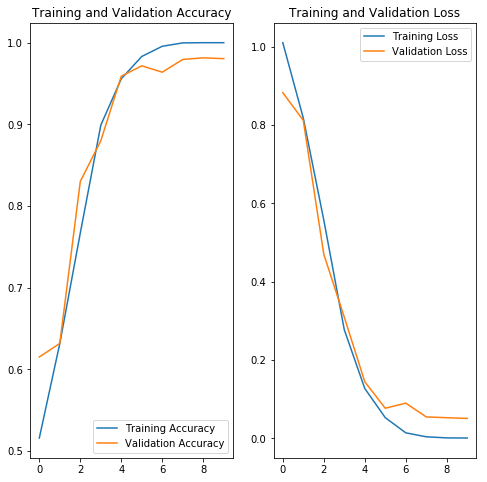

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### data augmentation to combat overfitting

In [36]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### visualizing augmented data on the same image several times

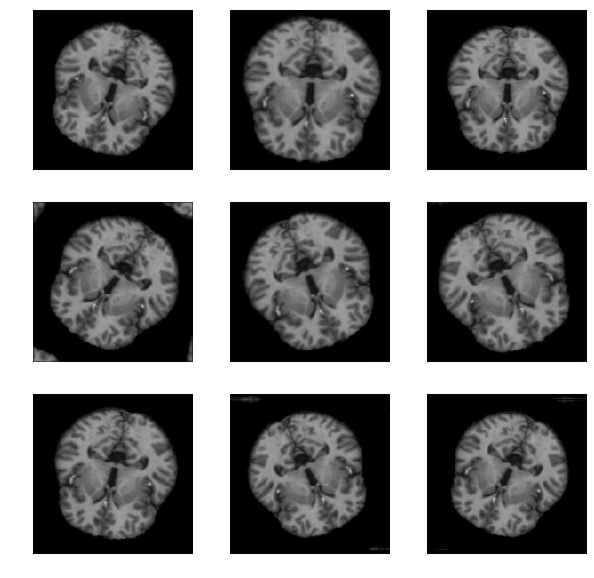

In [37]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### introducing Dropout to combat overfitting

In [38]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### compile and train model

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [41]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
129/129 [==============================] - 90s 700ms/step - loss: 1.0616 - accuracy: 0.4825 - val_loss: 0.9511 - val_accuracy: 0.5098
Epoch 2/15
129/129 [==============================] - 81s 626ms/step - loss: 0.9439 - accuracy: 0.5428 - val_loss: 0.8852 - val_accuracy: 0.5859
Epoch 3/15
129/129 [==============================] - 78s 605ms/step - loss: 0.9071 - accuracy: 0.5699 - val_loss: 0.8719 - val_accuracy: 0.6084
Epoch 4/15
129/129 [==============================] - 78s 606ms/step - loss: 0.9033 - accuracy: 0.5619 - val_loss: 1.0062 - val_accuracy: 0.5586
Epoch 5/15
129/129 [==============================] - 87s 673ms/step - loss: 0.8976 - accuracy: 0.5680 - val_loss: 0.8472 - val_accuracy: 0.6045
Epoch 6/15
129/129 [==============================] - 80s 620ms/step - loss: 0.8743 - accuracy: 0.5863 - val_loss: 0.8440 - val_accuracy: 0.6182
Epoch 7/15
129/129 [==============================] - 77s 596ms/step - loss: 0.8622 - accuracy: 0.5858 - val_loss: 0.8356 - val_ac

### visualize training results

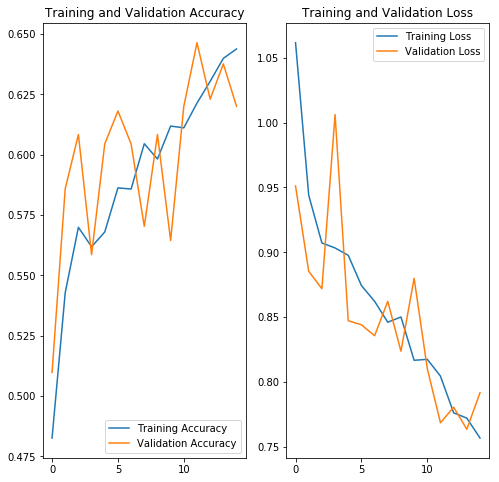

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Trying out edge detection

In [3]:
from skimage import filters
import matplotlib.pyplot as plt
img = scans[0][0]

NameError: name 'scans' is not defined

In [4]:
plt.imshow(img, cmap="gray")

NameError: name 'img' is not defined

In [119]:
pre_hor = filters.prewitt_h(img)
pre_ver = filters.prewitt_v(img)

# Sobel Kernel
ed_sobel = filters.sobel(img)

### Prewitt Vertical

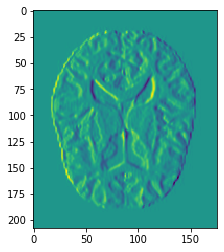

In [65]:
plt.imshow(pre_ver)

In [102]:
X_prev_train = np.array([filters.prewitt_v(i.reshape(208,176)).flatten() for i in X_train])
X_prev_dev = np.array([filters.prewitt_v(i.reshape(208,176)).flatten() for i in X_dev])

In [100]:
min([min(i) for i in X_prev_train])

-0.9934640522875817

In [103]:
# Multinomail Naive Bayes
alpha = [0.001, 0.01, 0.1, 1, 5, 10]

for a in alpha:
    mnb = MultinomialNB(alpha=a)
    mnb.fit(X_prev_train+1, Y_train)
    y_pred_mnb = mnb.predict(X_prev_dev+1)
    mnb_accuracy = accuracy_score(Y_dev, y_pred_mnb)
    print(f'Alpha: {a} \n Accuracy: {mnb_accuracy}') # this makes sense that it scores better than bnb because we didn't binarize our data in bnb

Alpha: 0.001 
 Accuracy: 0.6968119713728042
Alpha: 0.01 
 Accuracy: 0.6968119713728042
Alpha: 0.1 
 Accuracy: 0.6968119713728042
Alpha: 1 
 Accuracy: 0.6968119713728042
Alpha: 5 
 Accuracy: 0.6968119713728042
Alpha: 10 
 Accuracy: 0.6981132075471698


### Prewitt Horizontal

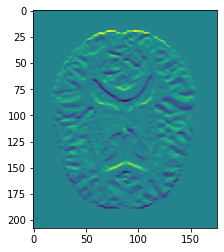

In [64]:
plt.imshow(pre_hor)

In [104]:
X_preh_train = np.array([filters.prewitt_h(i.reshape(208,176)).flatten() for i in X_train])
X_preh_dev = np.array([filters.prewitt_h(i.reshape(208,176)).flatten() for i in X_dev])

In [105]:
# Multinomail Naive Bayes
alpha = [0.001, 0.01, 0.1, 1, 5, 10]

for a in alpha:
    mnb = MultinomialNB(alpha=a)
    mnb.fit(X_preh_train+1, Y_train)
    y_pred_mnb = mnb.predict(X_preh_dev+1)
    mnb_accuracy = accuracy_score(Y_dev, y_pred_mnb)
    print(f'Alpha: {a} \n Accuracy: {mnb_accuracy}') # this makes sense that it scores better than bnb because we didn't binarize our data in bnb

Alpha: 0.001 
 Accuracy: 0.7000650618087183
Alpha: 0.01 
 Accuracy: 0.7000650618087183
Alpha: 0.1 
 Accuracy: 0.7000650618087183
Alpha: 1 
 Accuracy: 0.7000650618087183
Alpha: 5 
 Accuracy: 0.6994144437215355
Alpha: 10 
 Accuracy: 0.6994144437215355


### Sobel Kernel

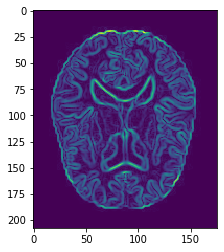

In [110]:
plt.imshow(ed_sobel)

In [89]:
X_sobel_train = np.array([filters.sobel(i.reshape(208,176)).flatten() for i in X_train])
X_sobel_dev = np.array([filters.sobel(i.reshape(208,176)).flatten() for i in X_dev])

In [92]:
# Multinomail Naive Bayes
alpha = [0.001, 0.01, 0.1, 1, 5, 10]

for a in alpha:
    mnb = MultinomialNB(alpha=a)
    mnb.fit(X_sobel_train, Y_train)
    y_pred_mnb = mnb.predict(X_sobel_dev)
    mnb_accuracy = accuracy_score(Y_dev, y_pred_mnb)
    print(f'Alpha: {a} \n Accuracy: {mnb_accuracy}') # this makes sense that it scores better than bnb because we didn't binarize our data in bnb

Alpha: 0.001 
 Accuracy: 0.6779440468445023
Alpha: 0.01 
 Accuracy: 0.6779440468445023
Alpha: 0.1 
 Accuracy: 0.6779440468445023
Alpha: 1 
 Accuracy: 0.6798959011060507
Alpha: 5 
 Accuracy: 0.682498373454782
Alpha: 10 
 Accuracy: 0.6844502277163305
